In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# read in the data

df_GDP = pd.read_csv('./summary_GDP.csv', header=0) #change csv name
df_GTP = pd.read_csv('./summary_GTP.csv', header=0)

In [3]:
timepoints = df_GDP['Deut Time (sec)'].unique()
peptides_GDP = df_GDP['Sequence'].unique()
peptides_GTP = df_GTP['Sequence'].unique()

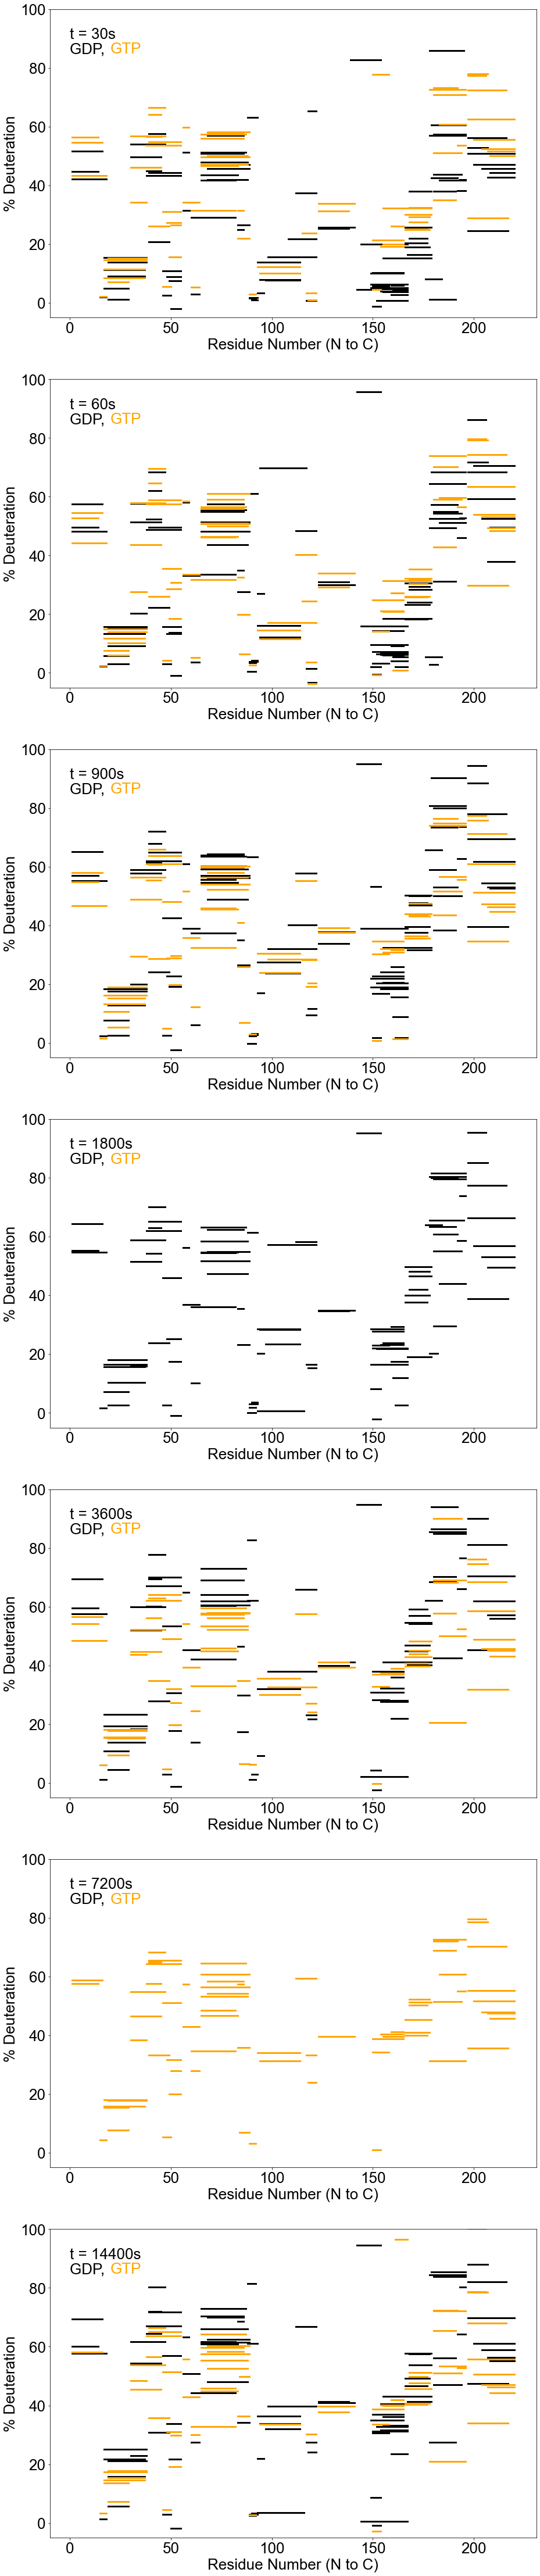

In [4]:
mpl.rcParams.update({"figure.figsize": (15, 10 * len(timepoints))})
mpl.rcParams.update({"font.size": 26, "font.family": 'Arial'})
fig, ax2 = plt.subplots(len(timepoints)-1)

for i in range(1, len(timepoints)):

    for j in range(len(peptides_GDP)):
        start = df_GDP[df_GDP['Sequence'] == peptides_GDP[j]]['Start'].tolist()[0]
        end = df_GDP[df_GDP['Sequence'] == peptides_GDP[j]]['End'].tolist()[0]
        xs = [start, end]
        ys_GDP = np.ones(2) * df_GDP[(df_GDP['Sequence'] == peptides_GDP[j]) & (df_GDP['Deut Time (sec)'] == timepoints[i])]['%D'].tolist()[0]
        ax2[i-1].plot(xs, ys_GDP, linewidth = 3, color='black')
    
    for j in range(len(peptides_GTP)):
        start = df_GTP[df_GTP['Sequence'] == peptides_GTP[j]]['Start'].tolist()[0]
        end = df_GTP[df_GTP['Sequence'] == peptides_GTP[j]]['End'].tolist()[0]
        xs = [start, end]
        ys_GTP = np.ones(2) * df_GTP[(df_GTP['Sequence'] == peptides_GTP[j]) & (df_GTP['Deut Time (sec)'] == timepoints[i])]['%D'].tolist()[0]
        ax2[i-1].plot(xs, ys_GTP, linewidth = 3, color='orange')

    ax2[i-1].set_xlabel("Residue Number (N to C)")
    ax2[i-1].set_ylabel("% Deuteration")
    ax2[i-1].set_ylim([-5, 100])
    s = "t = " + str(timepoints[i]) + "s"
    GDP_label = "GDP, "
    GTP_label = "GTP"
    ax2[i-1].text(0, 90, s)
    ax2[i-1].text(0, 85, GDP_label, color="black")
    ax2[i-1].text(20, 85, GTP_label, color="orange")
plt.savefig("./WoodsPlot_GDP_GTP.png",  transparent=True)